In [53]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model


In [7]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 36s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype #Means every pixel is represented as byte from 0 to 255 

dtype('uint8')

In [21]:
## Lets split the data into training and testing data
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.

In [22]:
len(X_valid)

5000

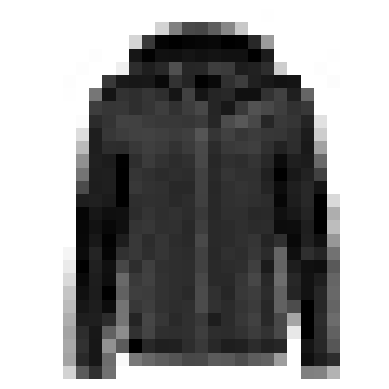

In [23]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

In [24]:
len(y_train)

55000

In [25]:
y_train[0]

4

In [26]:
## Here are the corresponding class names
class_names=['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','bag','Ankel boots']

In [27]:
class_names[y_train[0]]

'Coat'

In [28]:
X_valid.shape

(5000, 28, 28)

In [29]:
X_test.shape

(10000, 28, 28)

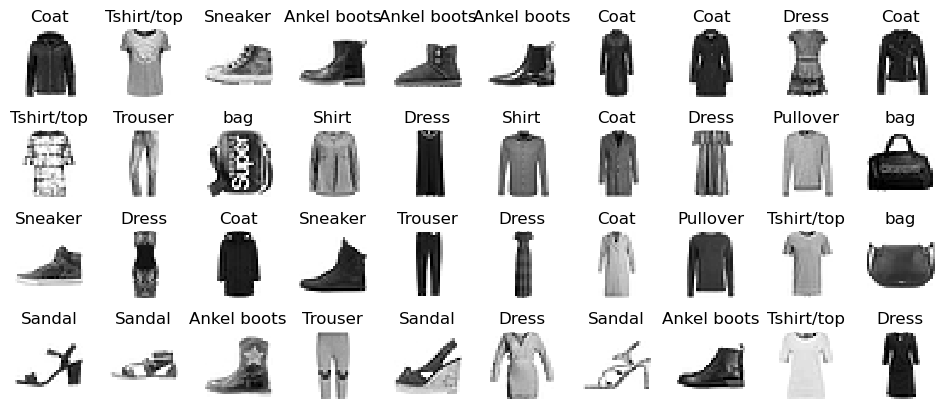

In [32]:
n_rows=4
n_col=10
plt.figure(figsize=(n_col*1.2,n_rows*1.2))
for row in range(n_rows):
    for col in range(n_col):
        index=n_col*row+col
        plt.subplot(n_rows,n_col,index+1)
        plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()



In [37]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


In [39]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [44]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300,010 (1.14 MB)

 Trainable params: 300,010 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
plot_model(model,'my_fashion_mnist_model.png',show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [57]:
hidden1=model.layers[1]
hidden1.name

'dense_2'

In [58]:
weights,biases=hidden1.get_weights()

In [59]:
weights

array([[ 0.01163048, -0.0463168 ,  0.01728503, ...,  0.02992853,
         0.01896288,  0.05299927],
       [ 0.00786027,  0.05317028, -0.0529566 , ...,  0.07120022,
         0.02505346,  0.02535655],
       [ 0.04899018, -0.04350878,  0.03436984, ..., -0.03825283,
        -0.06928267, -0.00902466],
       ...,
       [ 0.03572767, -0.02451554,  0.06665577, ..., -0.0117094 ,
        -0.00624362, -0.00392485],
       [ 0.0330286 ,  0.02058244, -0.03821332, ...,  0.00027493,
         0.02666856,  0.02626581],
       [ 0.07077622, -0.00362764,  0.0504759 , ...,  0.01158646,
         0.06322835,  0.01797008]], dtype=float32)

In [60]:
weights.shape

(784, 300)

In [61]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [62]:
biases.shape

(300,)

In [64]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [66]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [67]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 5.8855 - sparse_categorical_accuracy: 0.1012 - val_loss: 2.1087 - val_sparse_categorical_accuracy: 0.0914
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 2.0917 - sparse_categorical_accuracy: 0.0999 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.0914
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.0999 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.0914
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.0999 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.0914
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.0999 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.0914
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.0999 - val_loss: 2.3026 - val_sparse_categorical_ac

In [68]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [69]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [70]:
history.history.keys() ## What all we are printing

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

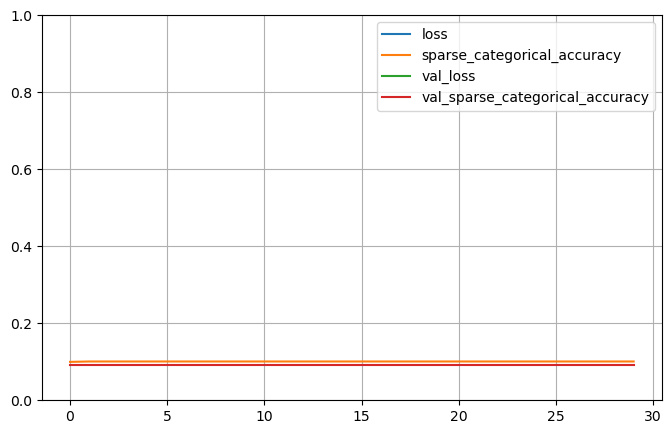

In [71]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)  ### make this as high as possible

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.3374 - sparse_categorical_accuracy: 0.1001


[2.330869674682617, 0.10000000149011612]

In [74]:
X_new=X_test[:3]

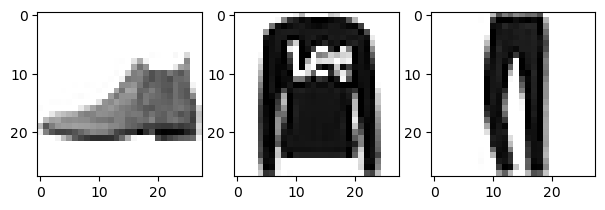

In [78]:
plt.figure(figsize=(7.2,2.4))
for index,image in enumerate(X_new):
    plt.subplot(1,3,index+1)
    plt.imshow(image,cmap='binary',interpolation='nearest')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [79]:
y_pred=np.argmax(model.predict(X_new),axis=1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


array([0, 0, 0])

In [80]:
np.array(class_names)[y_pred]

array(['Tshirt/top', 'Tshirt/top', 'Tshirt/top'], dtype='<U11')